In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preprocessing

In [4]:
df.drop('customerID', axis='columns', inplace=True)
df.shape

(7043, 20)

In [5]:
df1 = df[df.TotalCharges != ' '].copy()
df1.shape

(7032, 20)

In [6]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

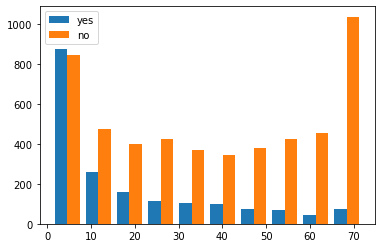

In [7]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no],label=['yes','no'])
plt.legend()

In [8]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df1[column].unique()}')

In [9]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [10]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [11]:
yes_no_columns = []

for column in df1:
    if ((df1[column].unique().size == 2) and ('No' in list(df1[column])) and ('Yes' in list(df1[column]))):
        yes_no_columns.append(column)

In [12]:
yes_no_columns

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [13]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No': 0}, inplace=True)

In [14]:
df1['gender'].replace({'Female':1, 'Male': 0}, inplace=True)

In [15]:
for column in df1:
    print(f'{column}: {df1[column].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [16]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [17]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [18]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [19]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [20]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4861,1,1,1,0,0.661972,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
1887,1,0,0,0,0.211268,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4505,1,0,1,0,1.000000,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
568,1,0,0,0,0.478873,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2787,0,0,1,1,1.000000,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


# Creating the ANN

In [21]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(5625, 26)

In [24]:
X_test.shape

(1407, 26)

In [25]:
import tensorflow as tf
import keras

In [28]:
# 3 layer model: input->hidden->output
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='relu'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train,epochs=500)

Epoch 1/500
176/176 [==============================] - 0s 2ms/step - loss: 0.8818 - accuracy: 0.6823
Epoch 2/500
176/176 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.7538
Epoch 3/500
176/176 [==============================] - 1s 3ms/step - loss: 0.5296 - accuracy: 0.7627
Epoch 4/500
176/176 [==============================] - 1s 3ms/step - loss: 0.5326 - accuracy: 0.7739
Epoch 5/500
176/176 [==============================] - 1s 4ms/step - loss: 0.5200 - accuracy: 0.7764
Epoch 6/500
176/176 [==============================] - 1s 5ms/step - loss: 0.5109 - accuracy: 0.7737
Epoch 7/500
176/176 [==============================] - 1s 6ms/step - loss: 0.4958 - accuracy: 0.7799
Epoch 8/500
176/176 [==============================] - 1s 4ms/step - loss: 0.4974 - accuracy: 0.7860
Epoch 9/500
176/176 [==============================] - 1s 4ms/step - loss: 0.5039 - accuracy: 0.7927
Epoch 10/500
176/176 [==============================] - 1s 4ms/step - loss: 0.4890 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.4102 - accuracy: 0.8148
Epoch 161/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4154 - accuracy: 0.8149
Epoch 162/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4279 - accuracy: 0.8096
Epoch 163/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4142 - accuracy: 0.8112
Epoch 164/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4125 - accuracy: 0.8112
Epoch 165/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.8151
Epoch 166/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8135
Epoch 167/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4105 - accuracy: 0.8137
Epoch 168/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4104 - accuracy: 0.8124
Epoch 169/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4103 - a

176/176 [==============================] - 1s 4ms/step - loss: 0.4569 - accuracy: 0.7972
Epoch 319/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4335 - accuracy: 0.8059
Epoch 320/500
176/176 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8089
Epoch 321/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4104 - accuracy: 0.8132
Epoch 322/500
176/176 [==============================] - 0s 3ms/step - loss: 0.4082 - accuracy: 0.8135
Epoch 323/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4104 - accuracy: 0.8139
Epoch 324/500
176/176 [==============================] - 0s 3ms/step - loss: 0.4059 - accuracy: 0.8146
Epoch 325/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4084 - accuracy: 0.8135
Epoch 326/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4114 - accuracy: 0.8114
Epoch 327/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4059 - a

176/176 [==============================] - 1s 3ms/step - loss: 0.3962 - accuracy: 0.8203
Epoch 477/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3986 - accuracy: 0.8176
Epoch 478/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3979 - accuracy: 0.8178
Epoch 479/500
176/176 [==============================] - 1s 4ms/step - loss: 0.3967 - accuracy: 0.8164
Epoch 480/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3965 - accuracy: 0.8185
Epoch 481/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3965 - accuracy: 0.8183
Epoch 482/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3972 - accuracy: 0.8178
Epoch 483/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3958 - accuracy: 0.8180
Epoch 484/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3998 - accuracy: 0.8176
Epoch 485/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3993 - a

In [32]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,),activation='relu'),
    keras.layers.Dense(13, input_shape=(26,),activation='relu'),
    keras.layers.Dense(6, input_shape=(26,),activation='sigmoid'),
    keras.layers.Dense(3, input_shape=(26,),activation='sigmoid'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train,epochs=25)

Epoch 1/25
176/176 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.6674
Epoch 2/25
176/176 [==============================] - 0s 3ms/step - loss: 0.5383 - accuracy: 0.7342
Epoch 3/25
176/176 [==============================] - 1s 4ms/step - loss: 0.4989 - accuracy: 0.7342
Epoch 4/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4800 - accuracy: 0.7461
Epoch 5/25
176/176 [==============================] - 1s 6ms/step - loss: 0.4675 - accuracy: 0.7899
Epoch 6/25
176/176 [==============================] - 1s 5ms/step - loss: 0.4584 - accuracy: 0.7996
Epoch 7/25
176/176 [==============================] - 1s 5ms/step - loss: 0.4523 - accuracy: 0.8009
Epoch 8/25
176/176 [==============================] - 2s 10ms/step - loss: 0.4459 - accuracy: 0.7988
Epoch 9/25
176/176 [==============================] - 1s 7ms/step - loss: 0.4401 - accuracy: 0.7996
Epoch 10/25
176/176 [==============================] - 1s 8ms/step - loss: 0.4365 - accuracy: 0.802

In [33]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 5ms/step - loss: 0.4431 - accuracy: 0.7783


[0.44314420223236084, 0.778251588344574]

In [34]:
yp = model.predict(X_test)
y_pred = []

for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



# Handaling imbalanced data

In [27]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(26,),activation='relu'),
        keras.layers.Dense(13, input_shape=(26,),activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),
    ])

    model.compile(
        optimizer='adam',
        loss=loss,
        metrics=['accuracy']
    )
    
    if weights == -1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weight=weights)
    
    print(model.evaluate(X_test,y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print(classification_report(y_test,y_preds))
    
    return y_preds

In [28]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5026 - accuracy: 0.7404
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4312 - accuracy: 0.7872
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4192 - accuracy: 0.8012
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4136 - accuracy: 0.8053
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4113 - accuracy: 0.8046
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4086 - accuracy: 0.8082
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4065 - accuracy: 0.8084
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4048 - accuracy: 0.8103
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8107
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4010 - accura

176/176 [==============================] - 1s 5ms/step - loss: 0.3488 - accuracy: 0.8338
Epoch 82/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3498 - accuracy: 0.8331
Epoch 83/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3489 - accuracy: 0.8343
Epoch 84/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3487 - accuracy: 0.8325
Epoch 85/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3484 - accuracy: 0.8341
Epoch 86/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3503 - accuracy: 0.8332
Epoch 87/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3472 - accuracy: 0.8359
Epoch 88/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3478 - accuracy: 0.8343
Epoch 89/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3487 - accuracy: 0.8313
Epoch 90/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3461 - accuracy: 

## Method 1: Undersampling

In [29]:
# Class count
count_class_0,count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [30]:
count_class_0

5163

In [31]:
count_class_1

1869

In [32]:
df_class_0.shape

(5163, 27)

In [33]:
df_class_1.shape

(1869, 27)

In [36]:
# undersampling
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [37]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [38]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [39]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.7378
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7666
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4913 - accuracy: 0.7689
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.7696
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7766
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.7763
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7746
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.7739
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7769
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4727 - accuracy: 0.7776
Epoch 11/

94/94 [==============================] - 1s 5ms/step - loss: 0.3991 - accuracy: 0.8171
Epoch 84/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4002 - accuracy: 0.8181
Epoch 85/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3983 - accuracy: 0.8204
Epoch 86/100
94/94 [==============================] - 1s 5ms/step - loss: 0.3979 - accuracy: 0.8207
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3972 - accuracy: 0.8221
Epoch 88/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3953 - accuracy: 0.8241
Epoch 89/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3940 - accuracy: 0.8237
Epoch 90/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3949 - accuracy: 0.8251
Epoch 91/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3947 - accuracy: 0.8207
Epoch 92/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3936 - accuracy: 0.8184
Epoch 93/100


## Method 2: Oversampling

In [40]:
count_class_0,count_class_1

(5163, 1869)

In [43]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)

df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.Churn.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [44]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [45]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [46]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5364 - accuracy: 0.7448
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4856 - accuracy: 0.7708
Epoch 3/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4799 - accuracy: 0.7738
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4759 - accuracy: 0.7766
Epoch 5/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4732 - accuracy: 0.7759
Epoch 6/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4709 - accuracy: 0.7751
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4692 - accuracy: 0.7808
Epoch 8/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4672 - accuracy: 0.7798
Epoch 9/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4647 - accuracy: 0.7801
Epoch 10/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4622 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.3852 - accuracy: 0.8220
Epoch 82/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3849 - accuracy: 0.8229
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3828 - accuracy: 0.8222
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3821 - accuracy: 0.8229
Epoch 85/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3821 - accuracy: 0.8277
Epoch 86/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3828 - accuracy: 0.8236
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3813 - accuracy: 0.8260
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3805 - accuracy: 0.8258
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3800 - accuracy: 0.8252
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3802 - accuracy: 

## Method 3: SMOTE

In [49]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [50]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE

In [51]:
smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_sample(X,y)

In [56]:
y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42,stratify=y_sm)

In [57]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5248 - accuracy: 0.7502
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4664 - accuracy: 0.7798
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4582 - accuracy: 0.7820
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4533 - accuracy: 0.7826
Epoch 5/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4489 - accuracy: 0.7857
Epoch 6/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4462 - accuracy: 0.7863
Epoch 7/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4427 - accuracy: 0.7916
Epoch 8/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4402 - accuracy: 0.7907
Epoch 9/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4363 - accuracy: 0.7966
Epoch 10/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4340 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.3496 - accuracy: 0.8467
Epoch 82/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3523 - accuracy: 0.8472
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3489 - accuracy: 0.8484
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.8481
Epoch 85/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.8485
Epoch 86/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3485 - accuracy: 0.8473
Epoch 87/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.8500
Epoch 88/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.8475
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3470 - accuracy: 0.8484
Epoch 90/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 

## Method 4: Use of Ensemble with undersampling

In [58]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [59]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [61]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [63]:
4130/3

1376.6666666666667

In [64]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [66]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

df3_class0.shape,df3_class1.shape

((4130, 27), (1495, 27))

In [77]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)
    
    X_train = df_train.drop('Churn',axis='columns')
    y_train = df_train.Churn
    
    return X_train,y_train

In [80]:
X_train,y_train = get_train_batch(df3_class0,df3_class1,0,1495)


y_preds1 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6196 - accuracy: 0.6783
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5170 - accuracy: 0.7542
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4960 - accuracy: 0.7595
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.7602
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7619
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.7645
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.7706
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7686
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.7712
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7746
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8247
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8261
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.8311
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8258
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8241
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8284
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3736 - accuracy: 0.8314
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.8271
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8244
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3720 - accuracy: 0.8288
Epoch 93/100


In [81]:
X_train,y_train = get_train_batch(df3_class0,df3_class1,1496,2990)


y_preds2 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6277 - accuracy: 0.6738
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.7578
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4941 - accuracy: 0.7688
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7698
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.7732
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7758
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4767 - accuracy: 0.7765
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4731 - accuracy: 0.7762
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.7772
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.7799
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8177
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8153
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3899 - accuracy: 0.8167
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3895 - accuracy: 0.8220
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8177
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8163
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8167
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8203
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.8190
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8197
Epoch 93/100


In [82]:
X_train,y_train = get_train_batch(df3_class0,df3_class1,2991,4130)


y_preds3 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6310
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.7521
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.7635
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5004 - accuracy: 0.7680
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.7654
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4893 - accuracy: 0.7741
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.7760
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7703
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.7711
Epoch 10/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.7775
Epoch 11/

83/83 [==============================] - 0s 3ms/step - loss: 0.4052 - accuracy: 0.8200
Epoch 84/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.8219
Epoch 85/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8204
Epoch 86/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4055 - accuracy: 0.8159
Epoch 87/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8159
Epoch 88/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.8189
Epoch 89/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.8185
Epoch 90/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4009 - accuracy: 0.8178
Epoch 91/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4024 - accuracy: 0.8181
Epoch 92/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8216
Epoch 93/100


In [92]:
y_pred_final = y_preds1.copy()

for i in range(len(y_preds1)):
    n_ones = y_preds1[i] + y_preds2[i] + y_preds3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [93]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1033
           1       0.48      0.80      0.60       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.79      0.72      0.74      1407

